In [1]:
#impprting dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [7]:
#data collection 

car_dataset = pd.read_csv('car data.csv')
car_dataset.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [9]:
#checking the number of rows and col

car_dataset.shape

(301, 9)

In [11]:
car_dataset.isnull().sum()    #checking the null values 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [35]:
car_dataset['Fuel_Type'].value_counts()   #checking the distribution of categorical data 

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [33]:
car_dataset['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [29]:
car_dataset['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [45]:
# encoding the categorical data {string to numerical }

car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)  # encoding "fuel_type" column 
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)  # encoding "seller_type" column 
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)  # encoding "transmission" column 


In [49]:
car_dataset.head()  #encoding done successfully

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0

In [51]:
#Splitting dataset into train and test


X=car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y= car_dataset['Selling_Price']

In [53]:
print(X,Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [57]:
#splitting tarin and test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)


In [59]:
#Model Training 

#Linear_Regression


lin_reg_model= LinearRegression()

In [61]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [65]:
#Evaluate our model 

#prediction on training data

training_data_prediction =  lin_reg_model.predict(X_train)

In [69]:
# R square error 

error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Square Error score = ", error_score)

R Square Error score =  0.8799451660493716


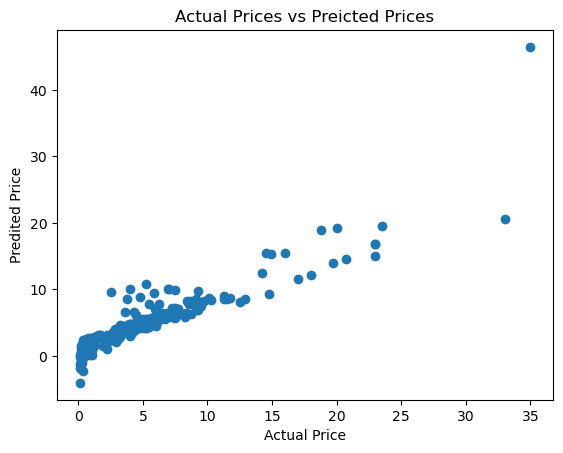

In [103]:
#Visualize the actual and predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predited Price")
plt.title("Actual Prices vs Preicted Prices")
plt.show()

In [75]:
#Evaluate our model 

#prediction on testing data

testing_data_prediction =  lin_reg_model.predict(X_test)

In [77]:
# R square error 

error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R Square Error score = ", error_score)

R Square Error score =  0.836576671502587


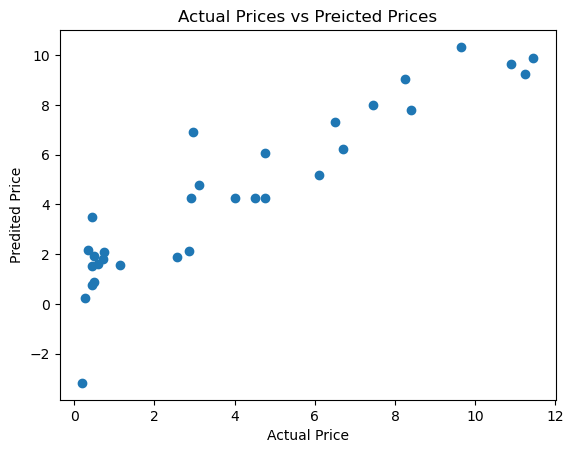

In [79]:
#Visualize the actual and predicted prices

plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predited Price")
plt.title("Actual Prices vs Preicted Prices")
plt.show()

In [83]:
# Lasso Regression 

#Model Training 


lass_reg_model= Lasso()

In [85]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [87]:
#Evaluate our model 

#prediction on training data

training_data_prediction =  lass_reg_model.predict(X_train)

In [91]:
# R square error 

error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Square Error in Lasso Regression Model = ", error_score)

R Square Error in Lasso Regression Model =  0.8427856123435794


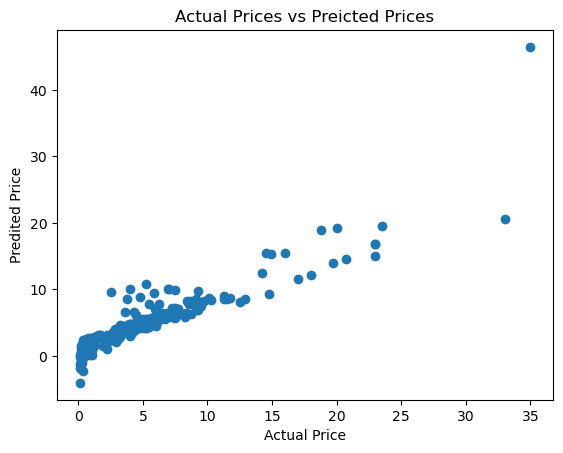

In [93]:
#Visualize the actual and predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predited Price")
plt.title("Actual Prices vs Preicted Prices")
plt.show()

In [95]:
#Evaluate our model 

#prediction on testing data

testing_data_prediction =  lass_reg_model.predict(X_test)

In [97]:
# R square error 

error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R Square Error score = ", error_score)

R Square Error score =  0.8709167941173195


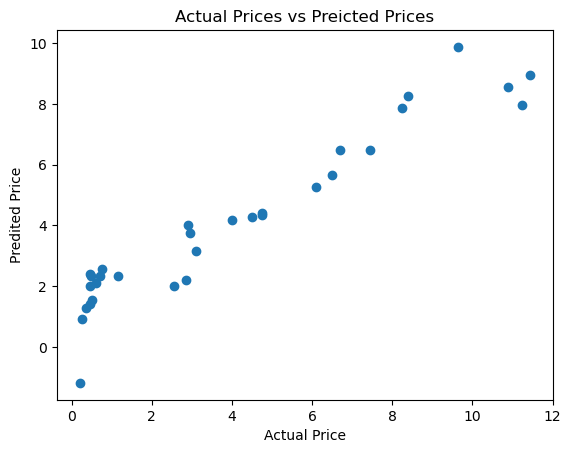

In [99]:
#Visualize the actual and predicted prices

plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predited Price")
plt.title("Actual Prices vs Preicted Prices")
plt.show()